Sent sample 0
Received sample 0

Sent sample 1
Received sample 1

Sent sample 2
Received sample 2

Sent sample 3
Received sample 3

Sent sample 4
Received sample 4

Sent sample 5
Received sample 5

Sent sample 6
Received sample 6

Sent sample 7
Received sample 7

Sent sample 8
Received sample 8

Sent sample 9
Received sample 9

Sent sample 10
Received sample 10

Sent sample 11
Received sample 11

Sent sample 12
Received sample 12

Sent sample 13
Received sample 13

Sent sample 14
Received sample 14

Sent sample 15
Received sample 15

Sent sample 16
Received sample 16

Sent sample 17
Received sample 17

Sent sample 18
Received sample 18

Sent sample 19
Received sample 19

Sent sample 20
Received sample 20

Sent sample 21
Received sample 21

Sent sample 22
Received sample 22

Sent sample 23
Received sample 23

Sent sample 24
Received sample 24

Sent sample 25
Received sample 25

Sent sample 26
Received sample 26

Sent sample 27
Received sample 27

Sent sample 28
Received sample 28

Sent 

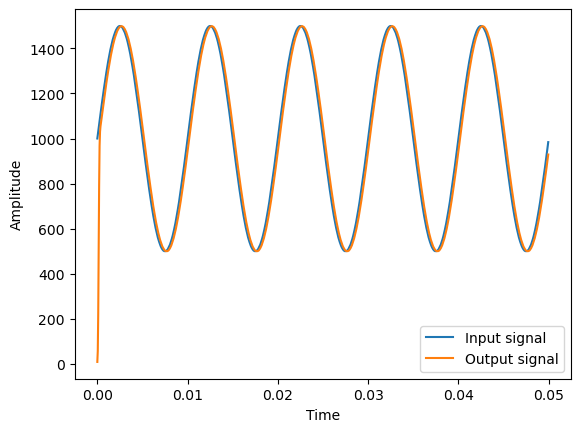

In [1]:
# Import all the required libraries
import serial
import numpy as np
import matplotlib.pyplot as plt
import time

# Use your specified COM port and baud rate
ser = serial.Serial("COM10", 4800)

# Modify these values to whatever is required (for generating input signal)
frequency = 100  # Hz
amplitude = 0.5  # Volt?
duration = 0.05   # second
sampling_rate = 20000  # samples per second

# Generate time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)

# Adding 1000 mV (or 1 V) offset and converting float to int
#(because transferring integers in mV is easier)
for i in range(len(sine_wave)):
    sine_wave[i] = int(1000 + 1000*sine_wave[i])
sine_int = np.array(sine_wave, dtype=np.int32)

# Conditioning the input signal such that each sample is a string of 4 characters
# (this will make receiving the samples and processing them easier in Pt-51)
x = [str(i) for i in sine_int] 
for i in range(len(x)):
    if len(x[i]) == 1:
        x[i] = '000' + x[i]
    elif len(x[i]) == 2:
        x[i] = '00' + x[i]
    elif len(x[i]) == 3:
        x[i] = '0' + x[i]
# x is the input array that will be sent to Pt-51

y = []
# y is the output array that will store the results obtained from Pt-51


# Send input signal serially and receive output serially
for i in range(int(sampling_rate * duration)):
    # This command will encode string into byte array and send 4 bytes (4 characters) serially to Pt-51
    d = ser.write(x[i].encode()) # ignore d (it just returns number of bytes transferred i.e 4)
    print("Sent sample " + str(i))
    time.sleep(0.1) # just a small delay to ensure smooth functioning
    
    # This command will append list y with decoded version of whatever data is sent back from Pt-51
    y.append(int(ser.readline().decode()))
    print("Received sample " + str(i))
    print()
ser.close

# Plotting to visualize input and output
plt.plot(t, sine_int)
plt.plot(t, np.array(y))
plt.legend(["Input signal", "Output signal"])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()